<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [222]:
df= pd.read_csv('loan_training_dataset.csv')

In [223]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [224]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [226]:
for k in df.columns:
    print(df[k].value_counts())

LP001922    1
LP001027    1
LP002784    1
LP001106    1
LP001238    1
           ..
LP002087    1
LP001114    1
LP001198    1
LP002562    1
LP002560    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: L

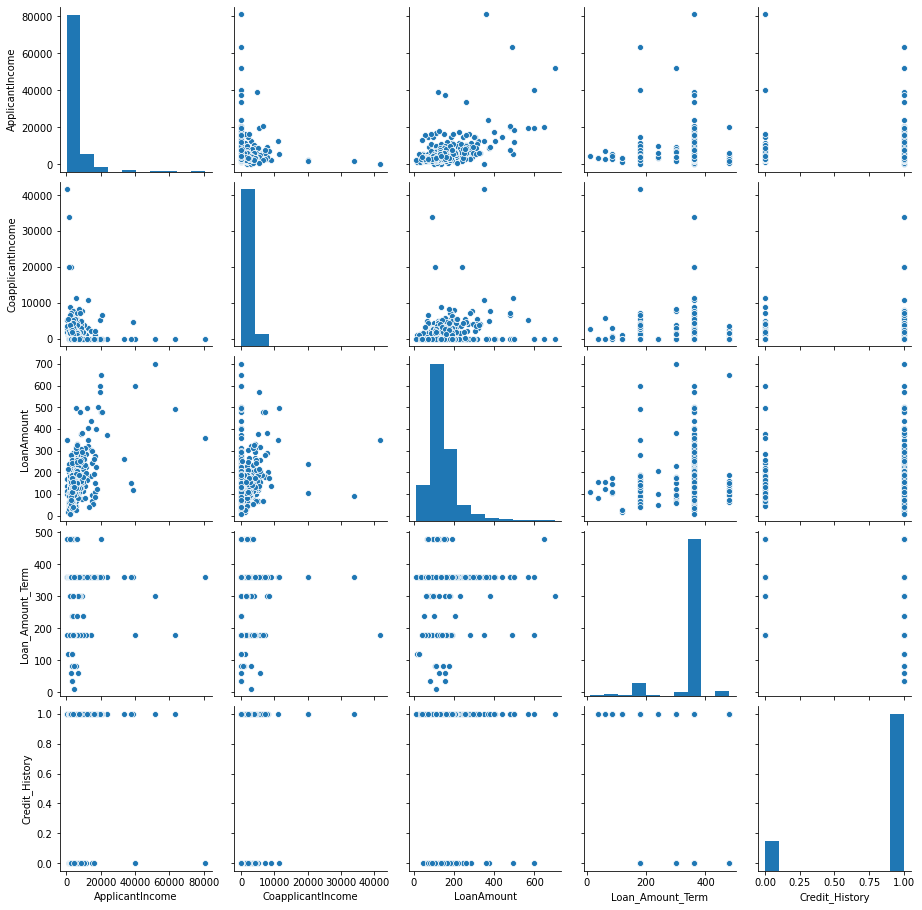

In [145]:
sns.pairplot(df)
plt.show()

Our data has outliers and hence there is significant difference between mean and median which means our data isn't centralised.

In [227]:
df['ApplicantIncome'].fillna(df['ApplicantIncome'].agg(np.mean),inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].agg(np.mean),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].agg(np.mean),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].agg(np.mean),inplace=True)
for k in df.columns:
    df[k].fillna(df[k].mode()[0],inplace=True)

In [228]:
print('ApplicantIncome ->',df['ApplicantIncome'].skew())
print('CoapplicantIncome ->',df['CoapplicantIncome'].skew())

print('LoanAmount ->',df['LoanAmount'].skew())




ApplicantIncome -> 6.539513113994625
CoapplicantIncome -> 7.491531216657306
LoanAmount -> 2.726601144105299


In [229]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=df['CoapplicantIncome'].map(lambda x : np.log(x) if x!=0 else 0)
df['LoanAmount']=np.log(df['LoanAmount'])
print('ApplicantIncome ->',df['ApplicantIncome'].skew())
print('CoapplicantIncome ->',df['CoapplicantIncome'].skew())

print('LoanAmount ->',df['LoanAmount'].skew())



ApplicantIncome -> 0.4795799780016222
CoapplicantIncome -> -0.17295088273888753
LoanAmount -> -0.22322704759640444


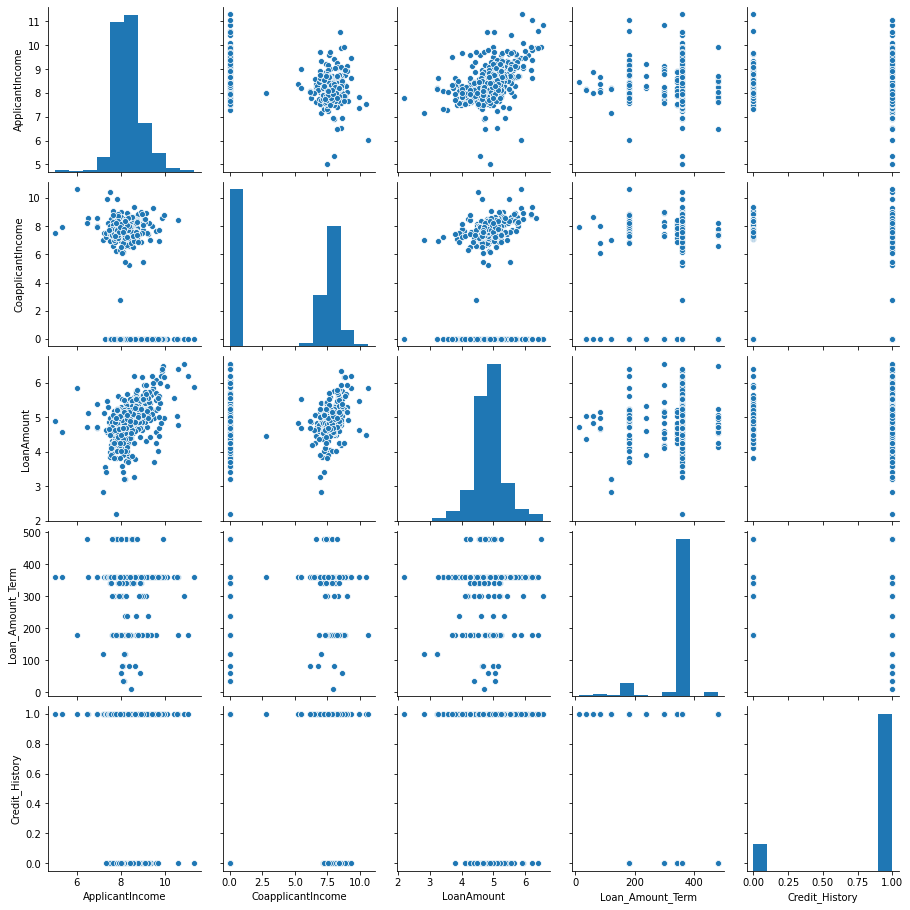

In [12]:
sns.pairplot(df)

In [230]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341213,4.289733,4.862066,342.000000,0.855049
std,0.645263,3.875680,0.496575,64.372489,0.352339
min,5.010635,0.000000,2.197225,12.000000,0.000000
25%,7.964677,0.000000,4.607658,360.000000,1.000000
50%,8.246040,7.080284,4.859812,360.000000,1.000000
75%,8.664750,7.739462,5.104426,360.000000,1.000000
max,11.302204,10.637465,6.551080,480.000000,1.000000


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [232]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,0.000000,4.262680,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,0.000000,3.688879,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.480639,5.533389,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,0.000000,5.231109,360.0,1.0,Urban,Y


In [233]:
df['Dependents'].replace('1',1,inplace=True)
df['Dependents'].replace('0',0,inplace=True)
df['Dependents'].replace('2',2,inplace=True)
df['Dependents'].replace('3+',3,inplace=True)

col={"Married":{"Yes":1,"No":0},
    "Education":{"Graduate":1,"Not Graduate":0},
     "Self_Employed":{"Yes":1,"No":0},
     "Property_Area":{"Urban":0,"Rural":1,"Semiurban":2},
    "Loan_Status":{"Y":1,"N":0},"Gender":{"Male":1,"Female":0}}
df=df.replace(col)

In [234]:
X=df.loc[:,df.columns!='Loan_Status']
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.674026,0.000000,4.986426,360.0,1.0,0
1,1,1,1,1,0,8.430109,7.318540,4.852030,360.0,1.0,1
2,1,1,0,1,1,8.006368,0.000000,4.189655,360.0,1.0,0
3,1,1,0,0,0,7.856707,7.765569,4.787492,360.0,1.0,0
4,1,0,0,1,0,8.699515,0.000000,4.948760,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972466,0.000000,4.262680,360.0,1.0,1
610,1,1,3,1,0,8.320205,0.000000,3.688879,180.0,1.0,1
611,1,1,1,1,0,8.996157,5.480639,5.533389,360.0,1.0,0
612,1,1,2,1,0,8.933664,0.000000,5.231109,360.0,1.0,0


In [235]:
Y=df['Loan_Status']

In [236]:
correlation=df.corr()
correlation.style.background_gradient(cmap='icefire')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.084514,0.220563,0.144378,-0.073567,0.009170,-0.082045,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.021424,0.317062,0.180178,-0.100863,0.010938,0.003071,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.115816,-0.000726,0.156391,-0.101054,-0.040160,0.001781,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.181713,-0.043131,0.143367,0.077242,0.073658,0.003592,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.189821,-0.092291,0.109629,-0.033943,-0.001550,0.021996,-0.003700
ApplicantIncome,0.084514,0.021424,0.115816,0.181713,0.189821,1.000000,-0.368224,0.491066,-0.030739,0.013468,0.018711,0.010977
CoapplicantIncome,0.220563,0.317062,-0.000726,-0.043131,-0.092291,-0.368224,1.000000,0.131021,0.013604,0.008258,0.010057,0.060566
LoanAmount,0.144378,0.180178,0.156391,0.143367,0.109629,0.491066,0.131021,1.000000,0.086531,-0.019542,0.047043,-0.041874
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.030739,0.013604,0.086531,1.000000,0.000432,0.089508,-0.020974
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,0.013468,0.008258,-0.019542,0.000432,1.000000,0.030248,0.540556


In [237]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [238]:
model1=XGBClassifier()
model1.fit(X,Y)
features = model1.feature_importances_
Columns = list(X.columns)
model2=RandomForestClassifier()
model2.fit(X,Y)
list1=list(enumerate(features))
list2=list(enumerate(features))

for i in range(len(list1)):
    print(Columns[i]," ",(list1[i][1]+list2[i][1])/2)


C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Gender   0.02639172039926052
Married   0.038568202406167984
Dependents   0.04267912730574608
Education   0.05420549586415291
Self_Employed   0.055217236280441284
ApplicantIncome   0.0458129458129406
CoapplicantIncome   0.05046673119068146
LoanAmount   0.047564003616571426
Loan_Amount_Term   0.05227535218000412
Credit_History   0.5373316407203674
Property_Area   0.04948757216334343


In [239]:
X=X.drop(['Gender','Dependents'],1)


In [240]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=6)
models=[]
models.append(('RFC',RandomForestClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('XGBC',XGBClassifier()))
result=pd.DataFrame()
for name,model in models:
    model.fit(X_train,Y_train)
    #cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    y_predict=model.predict(X_test)
    result=result.append({'model_name': name,'Accuracy': accuracy_score(Y_test,y_predict)},ignore_index=True)
result

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,model_name
0,0.829268,RFC
1,0.837398,LR
2,0.764228,XGBC
